In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
import pprint
import time
from datetime import datetime
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# We'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# When we run this cell, the output is a zip object in memory.

In [4]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

73.96811564141981 31.53101405066272
71.56447107353782 -42.568094082315525
62.565346993159096 -142.3759263503535
31.20115127874344 -66.9465637194963
-65.2594912190116 171.48259530826437
-15.866683392123093 155.50424793035467
-5.725362724664421 45.66492417076671
71.93478057854145 -140.40873058476635
-52.646143053711604 -137.68779447270418
-22.745815466386787 -31.359586919537378
9.844965574496001 -29.446501782794087
29.14108329855506 21.454300025664963
-29.53680258830179 -113.15298584548013
15.044361082318702 -43.56899196261389
82.73994303952742 -178.40411903849596
-19.62303631156219 -46.886338085007196
-55.29630659091023 -78.57827303170404
-66.70820633724267 131.78228704318695
-77.44701556535829 132.85420732659628
69.52933132677254 90.55263827279282
1.9385014293408886 -145.9268426147254
31.731859644744176 15.959508212832304
86.00779615324743 62.053470534470506
39.12362835708504 -50.75973014788045
-2.742344755884176 -73.74418979328227
26.0119848090076 -102.11788479241562
-85.1641263997928

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Generally, it isn't good coding practice to add the pass statement to the except block. 
# Ideally, we want to handle or catch each error as it happens and do something specific 
# (e.g., add another try block or print out the error).

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | haines junction
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | samarai
Processing Record 7 of Set 1 | lamu
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | jalu
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | araxa
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | surt
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record 22 of Set 1 | torbay
P

Processing Record 36 of Set 4 | sobolevo
Processing Record 37 of Set 4 | peniche
Processing Record 38 of Set 4 | pa sang
Processing Record 39 of Set 4 | tighina
Processing Record 40 of Set 4 | achit
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | miri
Processing Record 43 of Set 4 | humberto de campos
Processing Record 44 of Set 4 | sal rei
Processing Record 45 of Set 4 | teguldet
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | libertador general san martin
Processing Record 49 of Set 4 | rio gallegos
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | yeletskiy
City not found. Skipping...
Processing Record 5 of Set 5 | fort-shevchenko
Processing Record 6 of Set 5 | akyab
Processing Record 7 of Set 5 | marolambo
Proces

Processing Record 23 of Set 8 | mangit
Processing Record 24 of Set 8 | acapulco
Processing Record 25 of Set 8 | sento se
City not found. Skipping...
Processing Record 26 of Set 8 | uruzgan
Processing Record 27 of Set 8 | areia branca
Processing Record 28 of Set 8 | senador guiomard
Processing Record 29 of Set 8 | clyde
Processing Record 30 of Set 8 | santa clara
Processing Record 31 of Set 8 | qinzhou
Processing Record 32 of Set 8 | kinablangan
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | hackettstown
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | anchorage
Processing Record 37 of Set 8 | impfondo
Processing Record 38 of Set 8 | ngunguru
Processing Record 39 of Set 8 | liverpool
Processing Record 40 of Set 8 | okandja
City not found. Skipping...
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | krasnyy yar
Processing Record 43 of Set 8 | jibuti
Processing Record 44 of Set 8 | yirol
City not found. Skipping...
Processin

Processing Record 9 of Set 12 | ternate
Processing Record 10 of Set 12 | paka
Processing Record 11 of Set 12 | ossora
Processing Record 12 of Set 12 | kuche
City not found. Skipping...
Processing Record 13 of Set 12 | wageningen
Processing Record 14 of Set 12 | rania
Processing Record 15 of Set 12 | elban
Processing Record 16 of Set 12 | maceio
Processing Record 17 of Set 12 | chor
Processing Record 18 of Set 12 | veliki preslav
Processing Record 19 of Set 12 | stettler
Processing Record 20 of Set 12 | bonfim
Processing Record 21 of Set 12 | gezing
Processing Record 22 of Set 12 | bolshoye sorokino
City not found. Skipping...
Processing Record 23 of Set 12 | jomalig
City not found. Skipping...
Processing Record 24 of Set 12 | raga
Processing Record 25 of Set 12 | chifeng
Processing Record 26 of Set 12 | xuddur
Processing Record 27 of Set 12 | zambezi
Processing Record 28 of Set 12 | pangody
Processing Record 29 of Set 12 | charters towers
Processing Record 30 of Set 12 | tilichiki
Proc

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardo,70.3705,31.1107,51.78,93,100,9.22,NO,2022-08-06 16:13:40
1,Tasiilaq,65.6145,-37.6368,46.56,77,100,14.56,GL,2022-08-06 16:13:40
2,Haines Junction,60.7522,-137.5108,53.98,82,96,5.48,CA,2022-08-06 16:13:41
3,Hamilton,39.1834,-84.5333,82.20,97,75,6.91,US,2022-08-06 16:12:02
4,Bluff,-46.6000,168.3333,40.96,97,83,22.19,NZ,2022-08-06 16:13:41
5,Samarai,-10.6167,150.6667,79.86,86,96,10.29,PG,2022-08-06 16:13:41
6,Lamu,-2.2717,40.9020,75.42,74,7,15.46,KE,2022-08-06 16:13:42
7,Aklavik,68.2191,-135.0107,55.40,94,100,9.22,CA,2022-08-06 16:13:42
8,Rikitea,-23.1203,-134.9692,68.95,65,81,19.48,PF,2022-08-06 16:13:42
9,Vila Velha,-20.3297,-40.2925,80.55,66,20,17.27,BR,2022-08-06 16:13:42


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2022-08-06 16:13:40,70.3705,31.1107,51.78,93,100,9.22
1,Tasiilaq,GL,2022-08-06 16:13:40,65.6145,-37.6368,46.56,77,100,14.56
2,Haines Junction,CA,2022-08-06 16:13:41,60.7522,-137.5108,53.98,82,96,5.48
3,Hamilton,US,2022-08-06 16:12:02,39.1834,-84.5333,82.20,97,75,6.91
4,Bluff,NZ,2022-08-06 16:13:41,-46.6000,168.3333,40.96,97,83,22.19
...,...,...,...,...,...,...,...,...,...
546,Cap Malheureux,MU,2022-08-06 16:28:26,-19.9842,57.6142,66.47,83,16,5.01
547,Mana,GF,2022-08-06 16:28:27,5.6592,-53.7767,87.19,57,71,7.00
548,Korla,CN,2022-08-06 16:28:27,41.7597,86.1469,89.44,23,96,4.99
549,Tautira,PF,2022-08-06 16:28:27,-17.7333,-149.1500,75.72,79,100,23.69


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

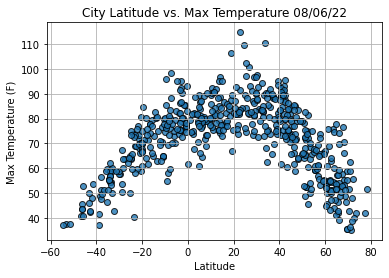

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

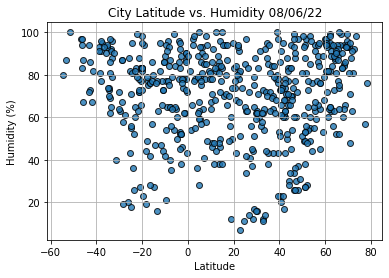

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

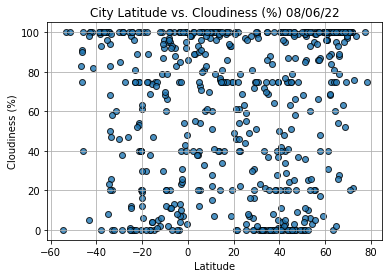

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

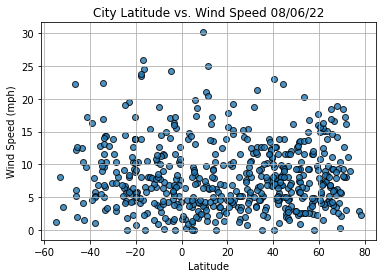

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()